Problem Statement:

You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
its competitors. You have to analyse the data of your company and find insights and stop your
customers from churning out to other telecom companies.

Customer_churn Dataset:

The details regarding this ‘customer_churn’ dataset are present in the data dictionary



Tasks to be done:

A) Data Manipulation:

a. Extract the 5th column & store it in ‘customer_5’

b. Extract the 15th column & store it in ‘customer_15’

c. Extract all the male senior citizens whose Payment Method is Electronic check &
store the result in ‘senior_male_electronic’

d. Extract all those customers whose tenure is greater than 70 months or their
Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

e. Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

f. Extract 333 random records from the customer_churndataframe& store the result in
‘customer_333’

g. Get the count of different levels from the ‘Churn’ column

B) Data Visualization:

a. Build a bar-plot for the ’InternetService’ column:

i. Set x-axis label to ‘Categories of Internet Service’

ii. Set y-axis label to ‘Count of Categories’

iii. Set the title of plot to be ‘Distribution of Internet Service’

iv. Set the color of the bars to be ‘orange’

b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges’

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
‘Contract’ on the x-axis.

C) Linear Regression:

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

D) Logistic Regression:

a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

E) Decision Tree:

a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

F) Random Forest:

a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
variables are ‘tenure’ and ‘MonthlyCharges’

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [119]:
customer=pd.read_csv('customer_churn.csv')

In [120]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
customer.shape

(7043, 21)

In [122]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [123]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [125]:
customer['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [126]:
customer['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [127]:
customer['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [128]:
customer['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

### So there are 11 values with spaces in 'Total charges' column. so need to remove it and the 11 rows are given below

In [129]:
customer[customer['TotalCharges'].isin([' '])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### Dealing with the null values

In [130]:
customer.replace(' ',np.nan,inplace=True)

In [131]:
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [132]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [133]:
#### converting object datatype of TotalCharges column to float datatype

customer['TotalCharges']=customer['TotalCharges'].astype(float)

In [134]:
### Dropping null

customer=customer.dropna()
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
#### a. Extract the 5th column & store it in ‘customer_5’

customer_5=customer.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

In [48]:
### b. Extract the 15th column & store it in ‘customer_15’

customer_15=customer.iloc[:,15]
customer_15

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

In [54]:
###c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

senior_male_electronic=customer[(customer['SeniorCitizen']==1) & (customer['gender']=='Male') & (customer['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [55]:
#### d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

customer_total_tenure=customer[(customer['tenure']>70) | (customer['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [56]:
### e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes=customer[(customer['Contract']=='Two year') & (customer['PaymentMethod']=='Mailed check') & (customer['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [57]:
#####f. Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’

customer_333=customer.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2190,5003-XZWWO,Male,0,Yes,No,71,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.20,5956.85,No
2239,8069-RHUXK,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Credit card (automatic),35.70,2545.70,No
5156,8109-YUOHE,Male,0,No,No,17,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,56.10,946.95,No
5344,6283-GITPX,Male,0,No,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),76.90,5522.70,No
1131,8257-RZAHR,Female,0,Yes,No,14,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),64.70,941.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6635,5474-LAMUQ,Male,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,533.90,No
2889,9830-ECLEN,Male,0,Yes,Yes,58,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,One year,No,Mailed check,50.00,2919.85,No
1183,0887-WBJVH,Female,0,Yes,No,53,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,93.45,4872.20,No
2564,3230-WYKIR,Male,0,No,No,18,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),82.00,1425.45,Yes


In [59]:
#### g. Get the count of different levels from the ‘Churn’ column

customer['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64


a. Build a bar-plot for the ’InternetService’ column:

i. Set x-axis label to ‘Categories of Internet Service’

ii. Set y-axis label to ‘Count of Categories’

iii. Set the title of plot to be ‘Distribution of Internet Service’

iv. Set the color of the bars to be ‘orange’



In [68]:
x=customer['InternetService'].value_counts().keys().tolist()
y=customer['InternetService'].value_counts().tolist()
print(x)
print(y)

['Fiber optic', 'DSL', 'No']
[3096, 2416, 1520]


<function matplotlib.pyplot.show(close=None, block=None)>

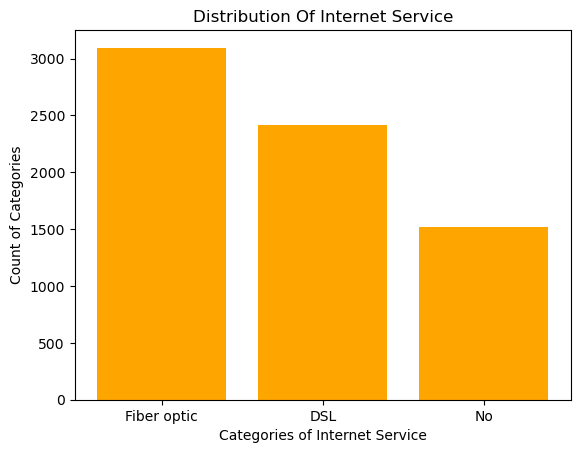

In [70]:
plt.bar(x,y,color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution Of Internet Service')
plt.show



b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’



<function matplotlib.pyplot.show(close=None, block=None)>

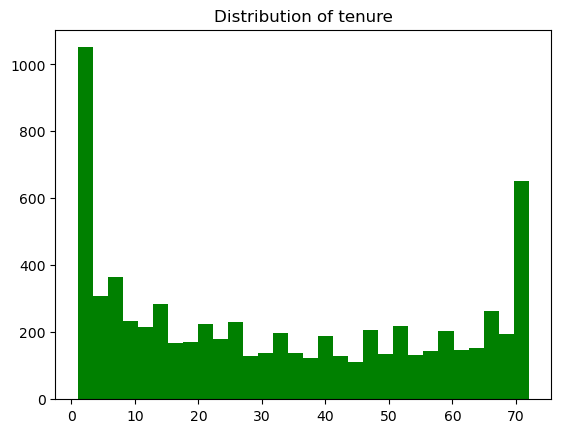

In [71]:
x=customer['tenure']

plt.hist(x,bins=30,color='green')
plt.title('Distribution of tenure')
plt.show

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges’



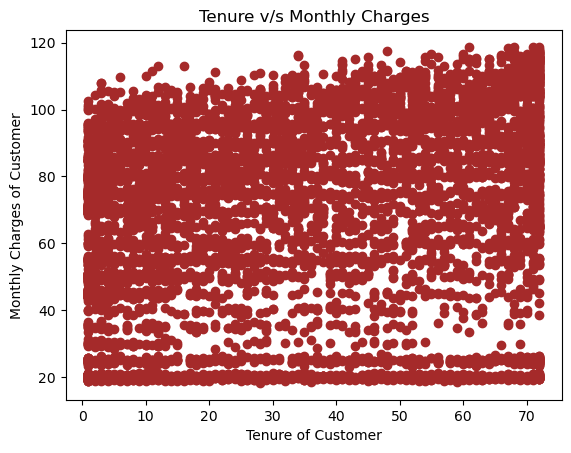

In [72]:
x=customer['tenure']
y=customer['MonthlyCharges']

plt.scatter(x,y,color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure v/s Monthly Charges')
plt.show()

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
‘Contract’ on the x-axis.

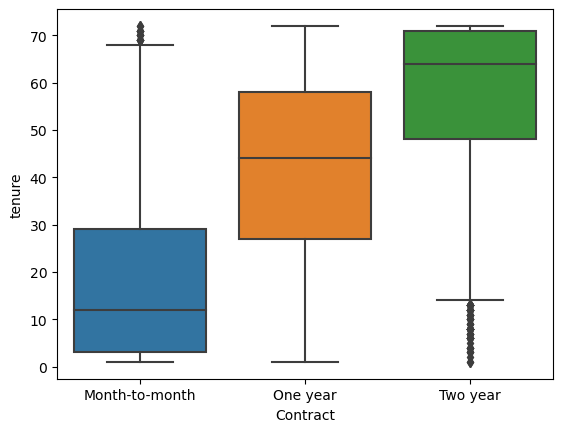

In [79]:
x=customer['Contract']
y=customer['tenure']

sns.boxplot(x='Contract',y='tenure',data=customer)
plt.show()

In [135]:
customer.drop(columns=['customerID'],inplace=True)

### Label encoding

In [136]:
col_list=[]
for i in customer.columns:
    if customer[i].dtype=='object':
        col_list.append(i)

In [137]:
le=LabelEncoder()
for i in col_list:
    customer[i]=le.fit_transform(customer[i])

In [138]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [139]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


### Outliers Detection and Handling

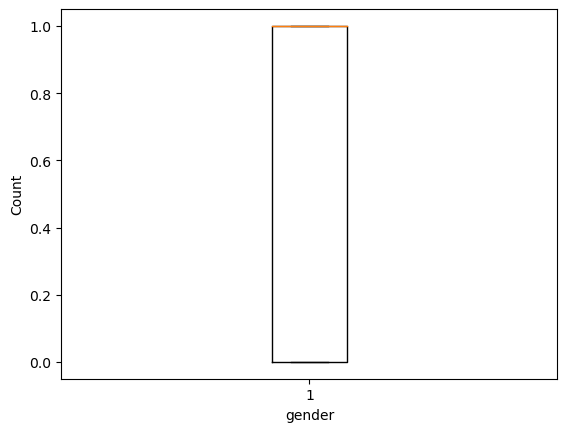

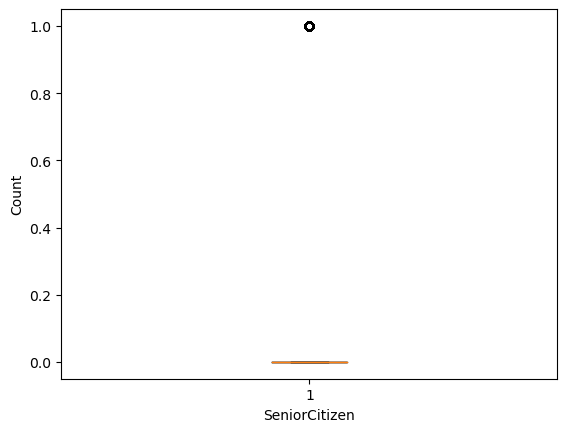

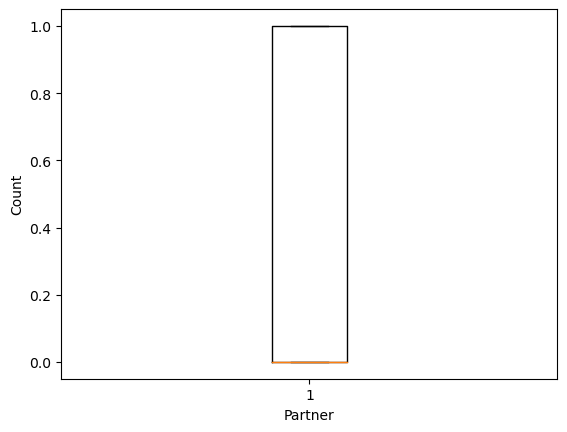

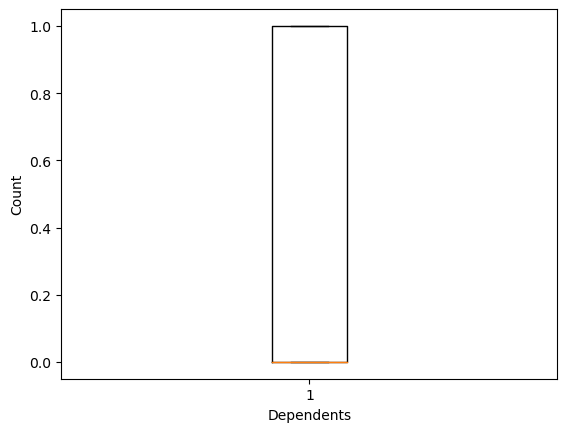

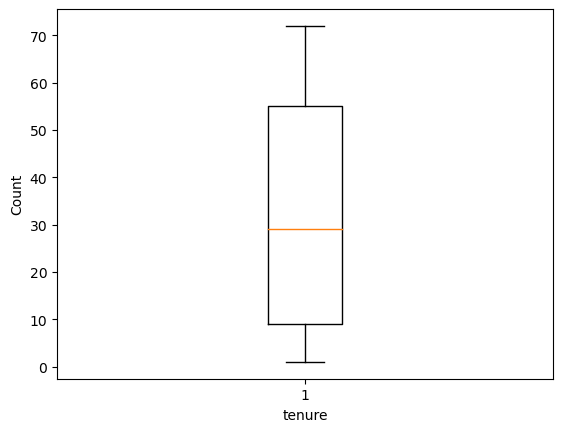

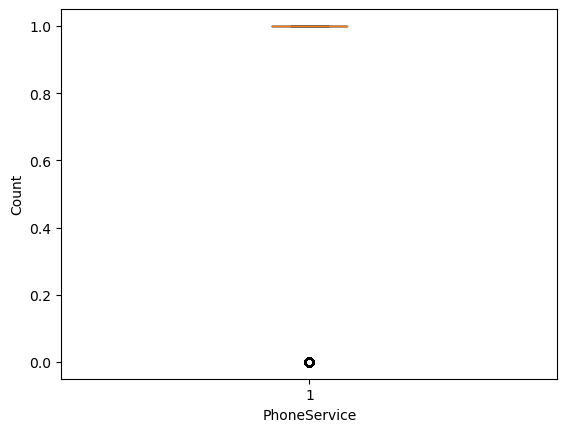

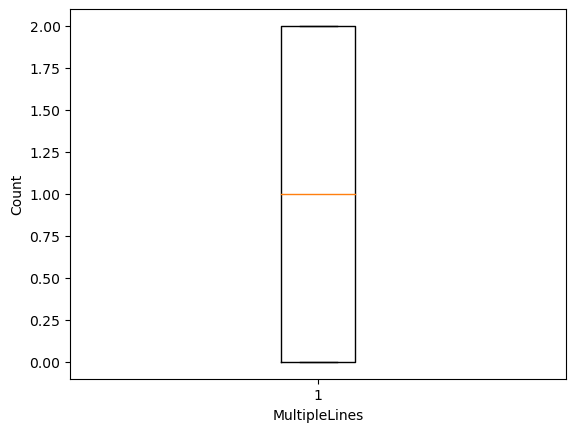

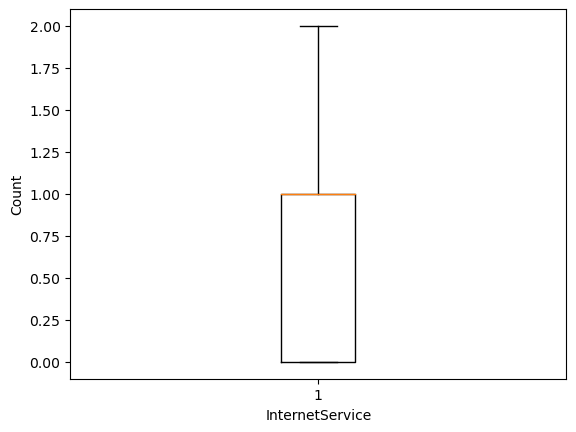

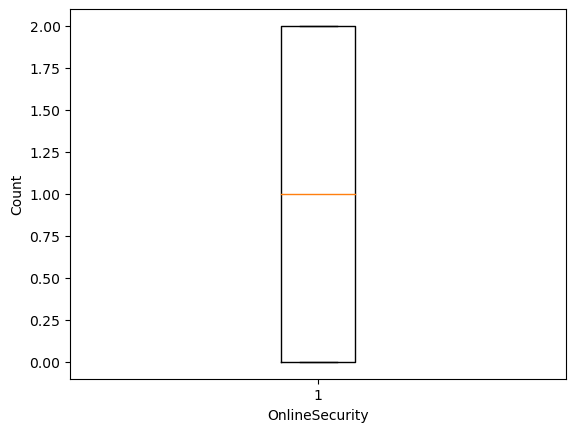

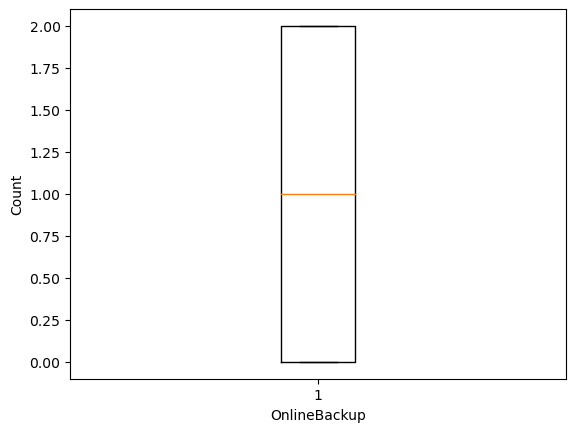

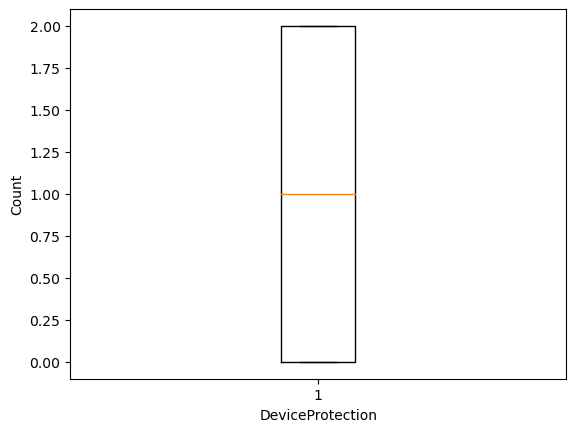

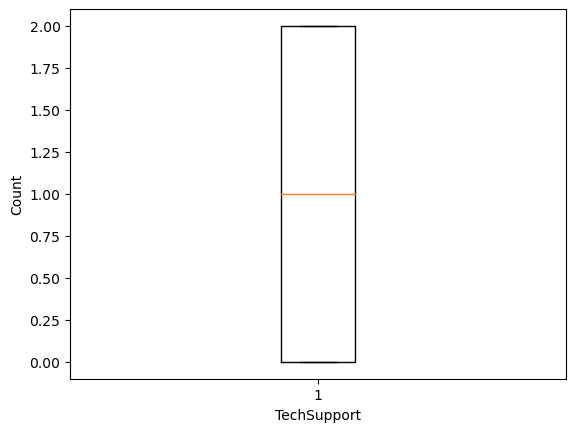

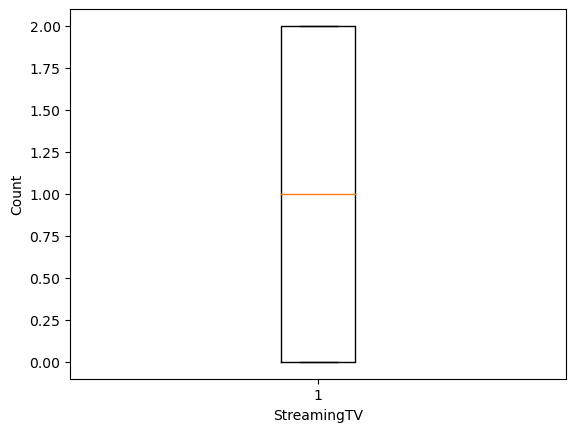

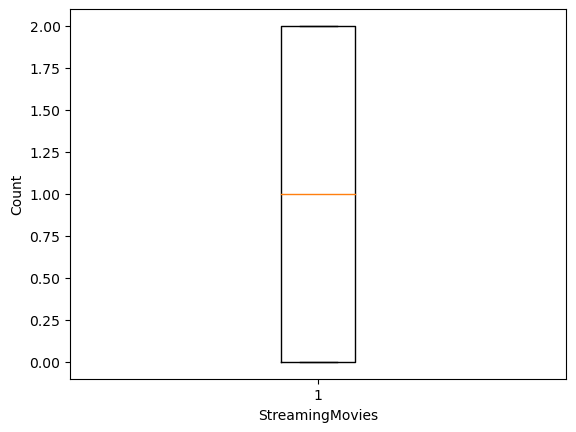

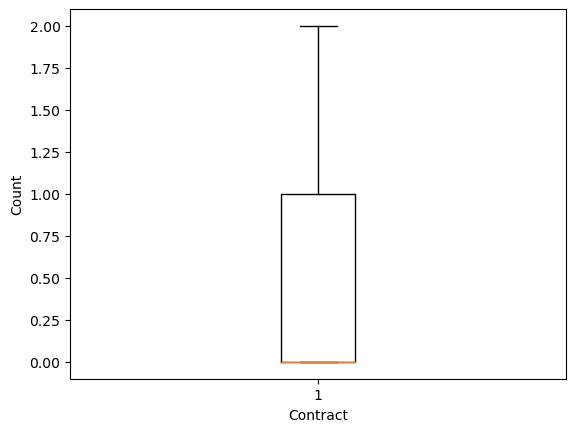

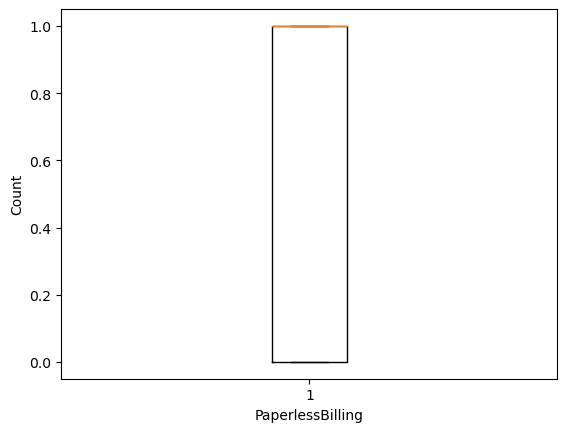

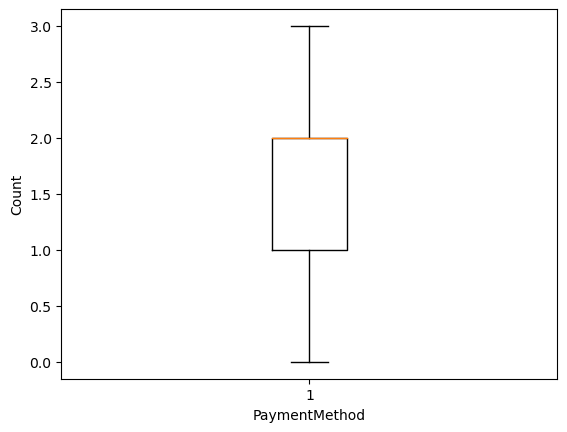

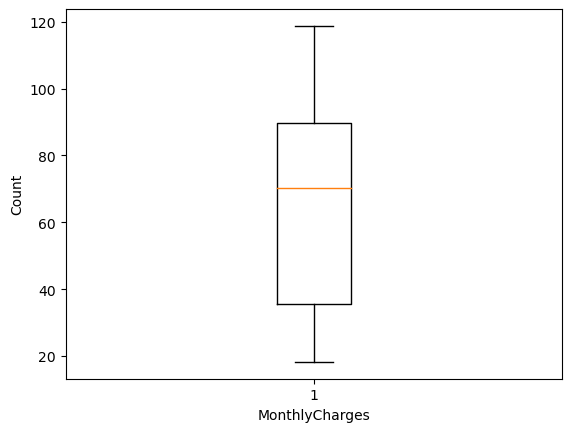

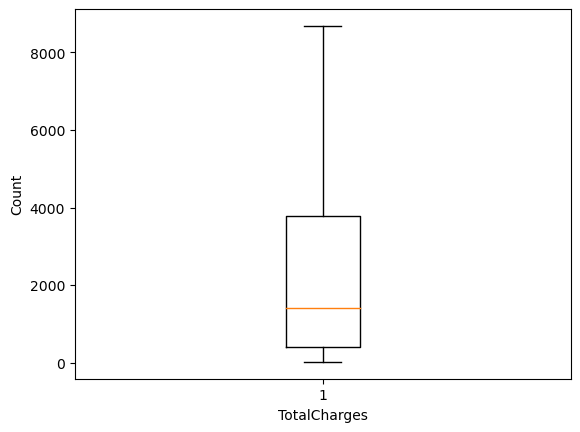

In [140]:
for i in customer.columns:
    if i!='Churn':
        plt.boxplot(customer[i])
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

<Axes: >

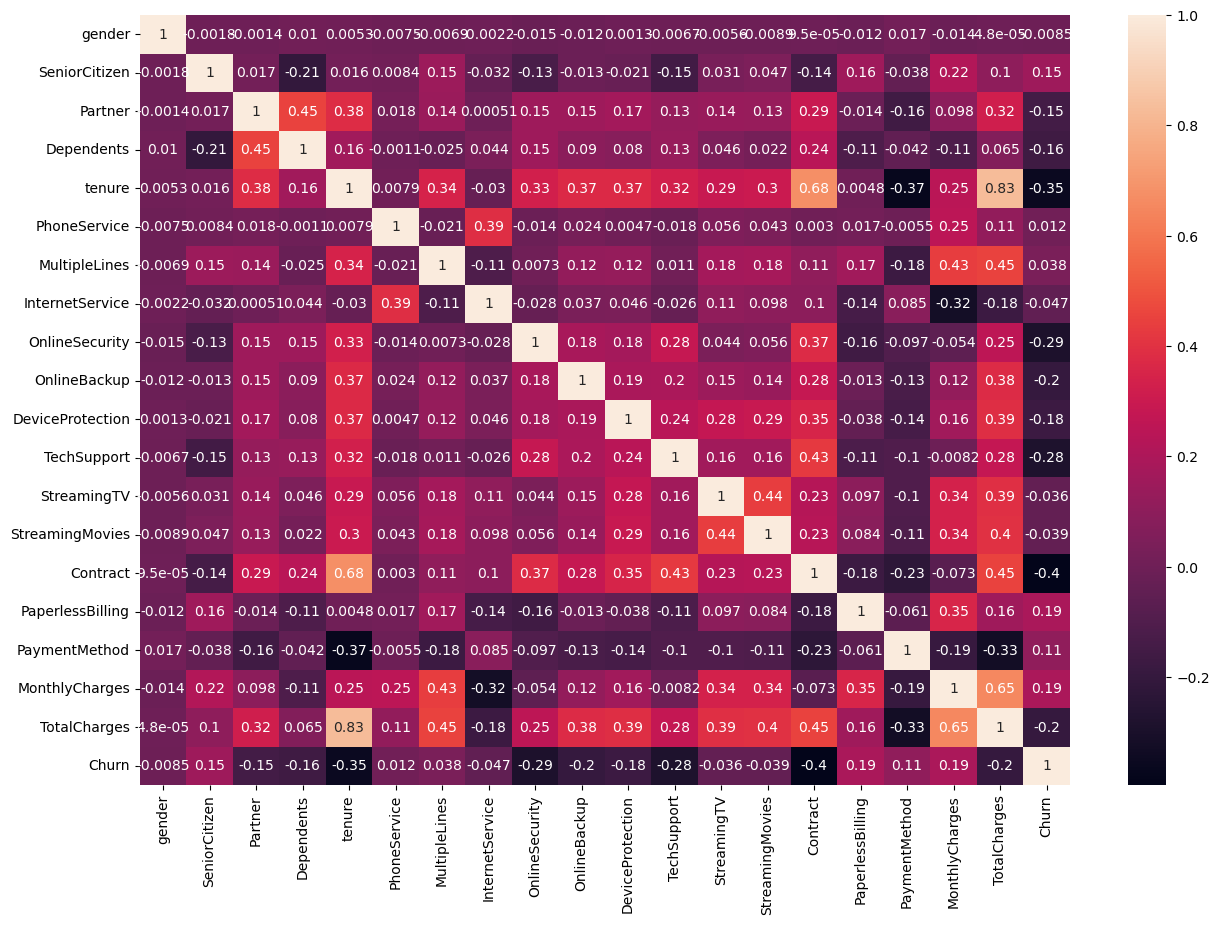

In [141]:
plt.figure(figsize=(15,10))
sns.heatmap(customer.corr(),annot=True)

## Model Building

### Linear Regression

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

In [175]:
x=customer[['tenure']]
y=customer['MonthlyCharges']

In [176]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)

In [177]:
lir=LinearRegression()
lir.fit(xtrain,ytrain)

LinearRegression()

In [178]:
ypred=lir.predict(xtest)

In [179]:
mse=mean_squared_error(ypred, ytest)
rmse = np.sqrt(mse)
rmse

29.133619934061535

### Logistic Regression


a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score


In [182]:
x=customer[['MonthlyCharges']]
y=customer['Churn']

In [183]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35,random_state=30)

In [184]:
lor=LogisticRegression()
lor.fit(xtrain,ytrain)

LogisticRegression()

In [185]:
ypred=lor.predict(xtest)

In [186]:
confusion_matrix(ypred,ytest)

array([[1801,  661],
       [   0,    0]], dtype=int64)

In [187]:
accuracy_score(ypred,ytest)

0.731519090170593


b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [196]:
x=customer[['tenure','MonthlyCharges']]
y=customer['Churn']

In [197]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=30)

In [198]:
lor=LogisticRegression()
lor.fit(xtrain,ytrain)

LogisticRegression()

In [199]:
ypred=lor.predict(xtest)

In [200]:
confusion_matrix(ypred,ytest)

array([[938, 214],
       [ 93, 162]], dtype=int64)

In [201]:
accuracy_score(ypred,ytest)

0.7818052594171997

### Decision Tree


a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [206]:
x=customer[['tenure']]
y=customer['Churn']

In [207]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=30)

In [208]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [209]:
ypred=dt.predict(xtest)

In [210]:
confusion_matrix(ypred,ytest)

array([[963, 267],
       [ 68, 109]], dtype=int64)

In [211]:
accuracy_score(ypred,ytest)

0.7619047619047619

### Random Forest

a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
variables are ‘tenure’ and ‘MonthlyCharges’

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [214]:
x=customer[['tenure','MonthlyCharges']]
y=customer['Churn']

In [215]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)

In [216]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [217]:
ypred=rf.predict(xtest)

In [218]:
confusion_matrix(ypred,ytest)

array([[1311,  282],
       [ 239,  278]], dtype=int64)

In [219]:
accuracy_score(ypred,ytest)

0.7530805687203791